In [1]:
%matplotlib qt
import matplotlib.pyplot as plt

import os.path as op
import numpy as np
import mne

mne.set_log_level('WARNING')

subjects_dir = op.expanduser("~/data/pic-name-data-bids/MRI/")
res_dir = op.expanduser("~/research/results/pic_name/CLIL")

In [2]:
clil = [1, 6, 10, 11, 15]
subjects = ["sub-%02d" % i for i in clil]
subjects

['sub-01', 'sub-06', 'sub-10', 'sub-11', 'sub-15']

In [3]:
evokeds_list = []
for subject in subjects:
    fname = op.join(res_dir, subject, subject+'-ave.fif')
    ev = mne.read_evokeds(fname)
    evokeds_list.append(ev[0])

In [4]:
plt.rcParams.update({'font.size': 7})

In [5]:
f, axes = plt.subplots(2, 3, figsize=(9.75, 3.5), sharex=True, sharey=True)
for ax, subject, evokeds in zip(axes.ravel(), subjects, evokeds_list):
    mne.viz.plot_evoked(evokeds, picks='mag', show=False, axes=ax, 
                        titles=subject, spatial_colors=True, xlim=(-0.1,0.6))  
plt.tight_layout()

/Users/chholak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


In [ ]:
plt.savefig(op.join(res_dir, 'evoked_CLIL_subjects.pdf'))

In [6]:
plt.rcParams.update({'font.size': 10})

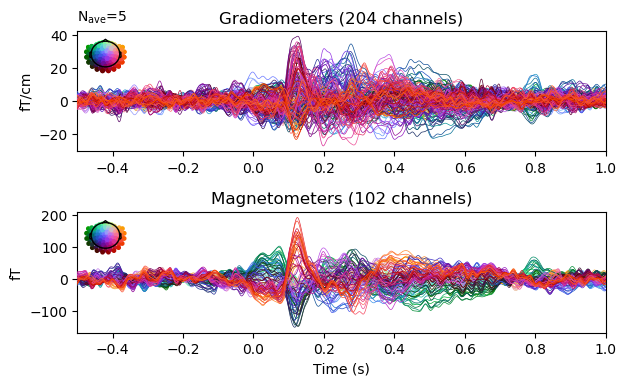

In [7]:
evoked_gave = mne.grand_average(evokeds_list)
evoked_gave.plot(spatial_colors=True)

In [ ]:
plt.savefig(op.join(res_dir, 'evoked_CLIL_gave.pdf'))

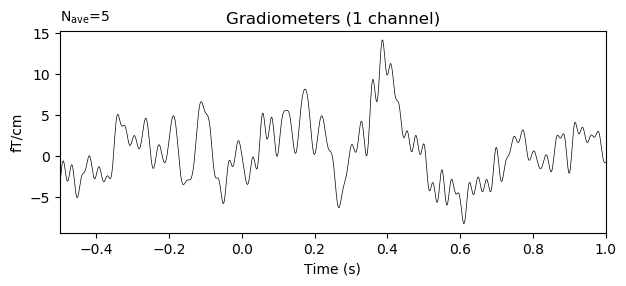

In [8]:
evoked_gave.plot(picks='MEG2343')

In [10]:
res_dir = op.expanduser("~/research/results/pic_name")
stc_fnames = []
for subject in subjects:
    stc_fnames.append(op.join(res_dir, subject + '/dspm_%s' % subject))
stcs = [mne.read_source_estimate(stc_fname) for stc_fname in stc_fnames]
average_stc = np.mean(stcs)

In [21]:
labels_aparc = mne.read_labels_from_annot('fsaverage', 'aparc', subjects_dir=subjects_dir)

labels_lat_occ = []
ROI = ['lateraloccipital-rh', 'lateraloccipital-lh']
for lbl in labels_aparc:
    if lbl.name in ROI:
        labels_lat_occ.append(lbl)
label_lat_occ = labels_lat_occ[0]
for i in range(1, len(labels_lat_occ)):
    label_lat_occ = label_lat_occ + labels_lat_occ[i]

average_stc_lat_occ = average_stc.in_label(label_lat_occ)
lat_occ_stc = np.mean(average_stc_lat_occ.data, axis=0)

In [20]:
labels_hcp = mne.read_labels_from_annot('fsaverage', 'HCPMMP1', 'both', subjects_dir=subjects_dir)
labels_vis = []
ROI = ['L_V1_ROI-lh', 'R_V1_ROI-rh']
for lbl in labels_hcp:
    if lbl.name in ROI:
        labels_vis.append(lbl)
label_vis = labels_vis[0]
for i in range(1, len(labels_vis)):
    label_vis = label_vis + labels_vis[i]

average_stc_vis = average_stc.in_label(label_vis)
vis_stc = np.mean(average_stc_vis.data, axis=0)

In [25]:
times = 1e3 * average_stc.times # times in ms
plt.figure()
h0 = plt.plot(times, lat_occ_stc, 'g', linewidth=3)
h1, = plt.plot(times, vis_stc, 'r', linewidth=3)
plt.xlim([-500, 1000])
plt.xlabel('Time (ms)')
plt.ylabel('dSPM')
plt.legend(('Lateral-Occipital', 'V1'))
plt.show()

In [26]:
plt.savefig(op.join(res_dir, 'evoked_label_CLIL.pdf'))

In [27]:
surfer_kwargs = dict(subject="fsaverage",
                     background="white", foreground='black',
                     cortex=("gray", -1, 6, True), smoothing_steps=10,
                     clim=dict(kind='value', lims=[2.5, 5, 6]),
                     time_viewer=False)

In [28]:
brain = average_stc.plot(initial_time=0.11, subjects_dir=subjects_dir, hemi="both", views='dor',
                         **surfer_kwargs)

In [29]:
brain.save_image(op.join(res_dir, "dspm_CLIL_t=110ms.png"))